# OVERVIEW

All Bank and NBFC’s are facing difficulty to manage their loans portfolio. Here we have a loan
portfolio dataset and we will analyse the default customer, the behaviour of repayment of the
customer and we can further fund to these customer in future or not.

We download a loan dataset of a bank having data of their customer in 2017. Accordingly we raise two problem statement which we
have to solve in the project. We downlaod the data set from Kaggle.

# Problem Statement

1. To find out the default customer.

2. To decide how much loan amount should be eligible for a customer as per their past repayment behaviour.

# Importing the required lib :

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

# Loading the dataset and showing top 5 rows. 

In [2]:
test=pd.read_csv("loan_data_2017.csv")
test.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  NaN        NaN    10000.0      10000.0          10000.0   60 months   
1  NaN        NaN    35000.0      35000.0          35000.0   60 months   
2  NaN        NaN    20000.0      20000.0          20000.0   60 months   
3  NaN        NaN    17475.0      17475.0          17475.0   60 months   
4  NaN        NaN     8000.0       8000.0           8000.0   36 months   

  int_rate  installment grade sub_grade             emp_title emp_length  \
0   19.53%       262.34     D        D5      lpn/charge nurse    4 years   
1   20.75%       941.96     E        E2                Coiler    3 years   
2    9.16%       416.73     B        B2  Reliability Engineer     1 year   
3   11.47%       384.06     B        B5                   NaN        NaN   
4    9.16%       255.00     B        B2            Technician  10+ years   

  home_ownership  annual_inc verification_status   issue_d loan_status  \
0            OWN     52000.0     Source Verified  Mar-2016  Fully Paid   
1       MORTGAGE     85000.0     Source Verified  Mar-2016  Fully Paid   
2       MORTGAGE     77000.0        Not Verified  Mar-2016     Current   
3       MORTGAGE     41682.0            Verified  Mar-2016     Current   
4           RENT     72000.0     Source Verified  Mar-2016     Current   

  pymnt_plan  url desc             purpose               title zip_code  \
0          n  NaN  NaN               other               Other    317xx   
1          n  NaN  NaN  debt_consolidation  Debt consolidation    144xx   
2          n  NaN  NaN    home_improvement    Home improvement    606xx   
3          n  NaN  NaN  debt_consolidation  Debt consolidation    796xx   
4          n  NaN  NaN  debt_consolidation  Debt consolidation    217xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         GA  15.00          0.0         Oct-2000             1.0   
1         NY  24.98          0.0         Dec-2008             1.0   
2         IL  13.75          0.0         Mar-2005             1.0   
3         TX  30.06          0.0         Feb-1976             0.0   
4         MD  22.63          0.0         Nov-2007             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                    44.0                    52.0       4.0      2.0   
1                     NaN                     NaN       9.0      0.0   
2                     NaN                     NaN      14.0      0.0   
3                     NaN                     NaN      10.0      0.0   
4                     NaN                     NaN       4.0      0.0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0     1077.0      35.9%       12.0                   w       0.00   
1    10167.0      46.6%       19.0                   w       0.00   
2     4204.0      13.9%       19.0                   w   13700.41   
3    24431.0      27.6%       18.0                   w   12189.23   
4    19735.0      98.7%       12.0                   w    3373.45   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00     11127.83         11127.83         10000.00   
1           0.00     37226.47         37226.47         35000.00   
2       13700.41      9147.70          9147.70          6299.59   
3       12189.23      8432.61          8432.61          5285.77   
4        3373.45      5601.86          5601.86          4626.55   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0        1127.83                 0.0         0.0                      0.0   
1        2226.47                 0.0         0.0                      0.0   
2        2848.11                 0.0         0.0                      0.0   
3        3146.84                 0.0         0.0                      0.0   
4         975.31                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Nov-

# Checking the shape of our dataset. 

In [3]:
test.shape

(133889, 145)

We have total 133889 Rows and 145 Columns

# Setting up a limit for the column can have null value, if columns have more null value and we can not treat them drop the entier Column.

In [4]:
limit=test.shape[0]*80/100
limit

107111.2

In [5]:
null=test.isnull().sum()
null=null[null>=limit]
null

id                                            133887
member_id                                     133889
url                                           133889
desc                                          133879
mths_since_last_record                        110218
annual_inc_joint                              131228
dti_joint                                     131230
verification_status_joint                     131228
revol_bal_joint                               133889
sec_app_earliest_cr_line                      133889
sec_app_inq_last_6mths                        133889
sec_app_mort_acc                              133889
sec_app_open_acc                              133889
sec_app_revol_util                            133889
sec_app_open_act_il                           133889
sec_app_num_rev_accts                         133889
sec_app_chargeoff_within_12_mths              133889
sec_app_collections_12_mths_ex_med            133889
sec_app_mths_since_last_major_derog           

In [6]:
limit2=test.shape[0]*39/100
limit2

52216.71

In [7]:
null2=test.isnull().sum()
null2=null2[null2>=limit2]
null2

id                                            133887
member_id                                     133889
url                                           133889
desc                                          133879
mths_since_last_delinq                         64567
mths_since_last_record                        110218
next_pymnt_d                                   57533
mths_since_last_major_derog                    95815
annual_inc_joint                              131228
dti_joint                                     131230
verification_status_joint                     131228
mths_since_recent_bc_dlq                      100133
mths_since_recent_revol_delinq                 86106
revol_bal_joint                               133889
sec_app_earliest_cr_line                      133889
sec_app_inq_last_6mths                        133889
sec_app_mort_acc                              133889
sec_app_open_acc                              133889
sec_app_revol_util                            

In [8]:
test=test.dropna(thresh=limit2,axis=1)
test.shape

(133889, 103)

In [9]:
test.drop(["mths_since_last_delinq","next_pymnt_d"],inplace=True,axis=1)
test.shape

(133889, 101)

In [10]:
test.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0    10000.0      10000.0          10000.0   60 months   19.53%       262.34   
1    35000.0      35000.0          35000.0   60 months   20.75%       941.96   
2    20000.0      20000.0          20000.0   60 months    9.16%       416.73   
3    17475.0      17475.0          17475.0   60 months   11.47%       384.06   
4     8000.0       8000.0           8000.0   36 months    9.16%       255.00   

  grade sub_grade             emp_title emp_length home_ownership  annual_inc  \
0     D        D5      lpn/charge nurse    4 years            OWN     52000.0   
1     E        E2                Coiler    3 years       MORTGAGE     85000.0   
2     B        B2  Reliability Engineer     1 year       MORTGAGE     77000.0   
3     B        B5                   NaN        NaN       MORTGAGE     41682.0   
4     B        B2            Technician  10+ years           RENT     72000.0   

  verification_status   issue_d loan_status pymnt_plan             purpose  \
0     Source Verified  Mar-2016  Fully Paid          n               other   
1     Source Verified  Mar-2016  Fully Paid          n  debt_consolidation   
2        Not Verified  Mar-2016     Current          n    home_improvement   
3            Verified  Mar-2016     Current          n  debt_consolidation   
4     Source Verified  Mar-2016     Current          n  debt_consolidation   

                title zip_code addr_state    dti  delinq_2yrs  \
0               Other    317xx         GA  15.00          0.0   
1  Debt consolidation    144xx         NY  24.98          0.0   
2    Home improvement    606xx         IL  13.75          0.0   
3  Debt consolidation    796xx         TX  30.06          0.0   
4  Debt consolidation    217xx         MD  22.63          0.0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0         Oct-2000             1.0       4.0      2.0     1077.0      35.9%   
1         Dec-2008             1.0       9.0      0.0    10167.0      46.6%   
2         Mar-2005             1.0      14.0      0.0     4204.0      13.9%   
3         Feb-1976             0.0      10.0      0.0    24431.0      27.6%   
4         Nov-2007             0.0       4.0      0.0    19735.0      98.7%   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0       12.0                   w       0.00           0.00     11127.83   
1       19.0                   w       0.00           0.00     37226.47   
2       19.0                   w   13700.41       13700.41      9147.70   
3       18.0                   w   12189.23       12189.23      8432.61   
4       12.0                   w    3373.45        3373.45      5601.86   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0         11127.83         10000.00        1127.83                 0.0   
1         37226.47         35000.00        2226.47                 0.0   
2          9147.70          6299.59        2848.11                 0.0   
3          8432.61          5285.77        3146.84                 0.0   
4          5601.86          4626.55         975.31                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0         0.0                      0.0     Nov-2016          9575.49   
1         0.0                      0.0     Aug-2016           509.10   
2         0.0                      0.0     Feb-2018           416.73   
3         0.0                      0.0     Feb-2018           384.06   
4         0.0                      0.0     Feb-2018           255.00   

  last_credit_pull_d  collections_12_mths_ex_med  policy_code  \
0           Dec-2017                         0.0          1.0   
1           Feb-2018                         0.0          1.0   
2           Feb-2018                         0.0          1.0   
3           Feb-2018                         0.0          1.0   
4           Feb-2018                         0

# Copying data so we have the original data with us and we did all the analysis on copied data

In [11]:
test_copy=test.copy()

# Deleting more columns which is not required

In [12]:
test_copy.drop(["funded_amnt","funded_amnt_inv","sub_grade","emp_title","title","zip_code","earliest_cr_line","last_credit_pull_d","revol_bal","total_pymnt_inv","policy_code","open_il_12m","open_rv_12m","max_bal_bc","total_rev_hi_lim","mo_sin_old_il_acct","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op","mo_sin_rcnt_tl","mths_since_recent_bc","disbursement_method"],inplace=True,axis=1)

In [13]:
test_copy.shape

(133889, 80)

# Checking the correlation, If correlation value is > than 0.7(Light color) or lesser than -0.7(Dark color), Drop one of the column.

In [14]:
test_copy.corr()

loan_amnt  installment  annual_inc       dti  \
loan_amnt                    1.000000     0.944042    0.303144  0.014563   
installment                  0.944042     1.000000    0.289789  0.025620   
annual_inc                   0.303144     0.289789    1.000000 -0.166451   
dti                          0.014563     0.025620   -0.166451  1.000000   
delinq_2yrs                 -0.005336     0.003727    0.035906 -0.014095   
inq_last_6mths              -0.030593     0.001185    0.024817  0.017257   
open_acc                     0.186333     0.174888    0.128525  0.273637   
pub_rec                     -0.070967    -0.055564   -0.007769 -0.048923   
total_acc                    0.212009     0.188918    0.161516  0.226472   
out_prncp                    0.501135     0.366080    0.131823  0.041793   
out_prncp_inv                0.501184     0.366082    0.131864  0.041701   
total_pymnt                  0.802804     0.817772    0.260092 -0.017710   
total_rec_prncp              0.666628     0.704468    0.242293 -0.062900   
total_rec_int                0.703289     0.630842    0.146327  0.131560   
total_rec_late_fee           0.078363     0.092808    0.035713  0.000962   
recoveries                   0.120555     0.128248    0.018286  0.043229   
collection_recovery_fee      0.120221     0.128351    0.018215  0.043876   
last_pymnt_amnt              0.310695     0.305472    0.105947 -0.032233   
collections_12_mths_ex_med  -0.025293    -0.019506   -0.004959 -0.004469   
acc_now_delinq              -0.002195     0.002719    0.017116  0.004082   
tot_coll_amt                -0.026570    -0.022246   -0.003036 -0.014051   
tot_cur_bal                  0.325822     0.292836    0.384624  0.003759   
open_acc_6m                 -0.033697    -0.006211    0.032243  0.054527   
open_act_il                  0.027291     0.021183    0.060080  0.235766   
open_il_24m                  0.018595     0.028767    0.084617  0.255469   
mths_since_rcnt_il          -0.006055    -0.010842   -0.063916 -0.246800   
total_bal_il                 0.155310     0.143768    0.197708  0.253380   
il_util                     -0.097389    -0.085368   -0.038997  0.023606   
open_rv_24m                 -0.044102    -0.012584   -0.016034  0.042092   
all_util                     0.023828     0.038412    0.007969  0.205842   
inq_fi                       0.001873     0.017532    0.043745  0.080990   
total_cu_tl                  0.070691     0.060511    0.035319  0.121671   
inq_last_12m                -0.004141     0.023876    0.057917  0.046442   
acc_open_past_24mths        -0.009711     0.017755    0.045963  0.150675   
avg_cur_bal                  0.242022     0.213671    0.295703 -0.111420   
bc_open_to_buy               0.195152     0.161751    0.144312 -0.083107   
bc_util                      0.067897     0.083082    0.004578  0.186996   
chargeoff_within_12_mths     0.001455     0.005563    0.007467 -0.002850   
delinq_amnt                  0.005783     0.008646    0.009464 -0.004735   
mort_acc                     0.238419     0.202085    0.211684 -0.034176   
mths_since_recent_inq        0.005010    -0.013625   -0.037750 -0.010367   
num_accts_ever_120_pd       -0.056346    -0.043458    0.008810 -0.040762   
num_actv_bc_tl               0.207538     0.205114    0.110016  0.170311   
num_actv_rev_tl              0.167504     0.170027    0.081845  0.246549   
num_bc_sats                  0.232748     0.219853    0.133406  0.116059   
num_bc_tl                    0.209359     0.194115    0.131425  0.085935   
num_il_tl                    0.077164     0.063052    0.081454  0.222304   
num_op_rev_tl                0.167988     0.163236    0.078864  0.179753   
num_rev_accts                0.180412     0.167687    0.106738  0.140088   
num_rev_tl_bal_gt_0          0.162111     0.164940    0.075833  0.248963   
num_sats                     0.185732     0.174233    0.127453  0.273231   
num_tl_120dpd_2m            -0.003878    -0.002695    0.007002 -0.003237   


In [15]:
plt.figure(figsize=(179,103))
sns.heatmap(test_copy.corr(),annot=True)

<AxesSubplot:>

# Creating user define function to find out which columns are highly correlated.

In [16]:
def correlation(dataset,thres):
    col_corr=set() # set of all the names of correlated columns 
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> thres:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
corr_features=correlation(test_copy,0.7)
corr_features

{'acc_open_past_24mths',
 'avg_cur_bal',
 'collection_recovery_fee',
 'installment',
 'last_pymnt_amnt',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_30dpd',
 'num_tl_op_past_12m',
 'out_prncp_inv',
 'percent_bc_gt_75',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_acc',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'total_pymnt',
 'total_rec_int',
 'total_rec_prncp'}

# Droping all the correlated columns

In [18]:
test_copy.drop(corr_features,axis=1,inplace=True)

In [19]:
test_copy.shape

(133889, 55)

# Again ploting the heatmap to check the value are correct or not.

<AxesSubplot:>

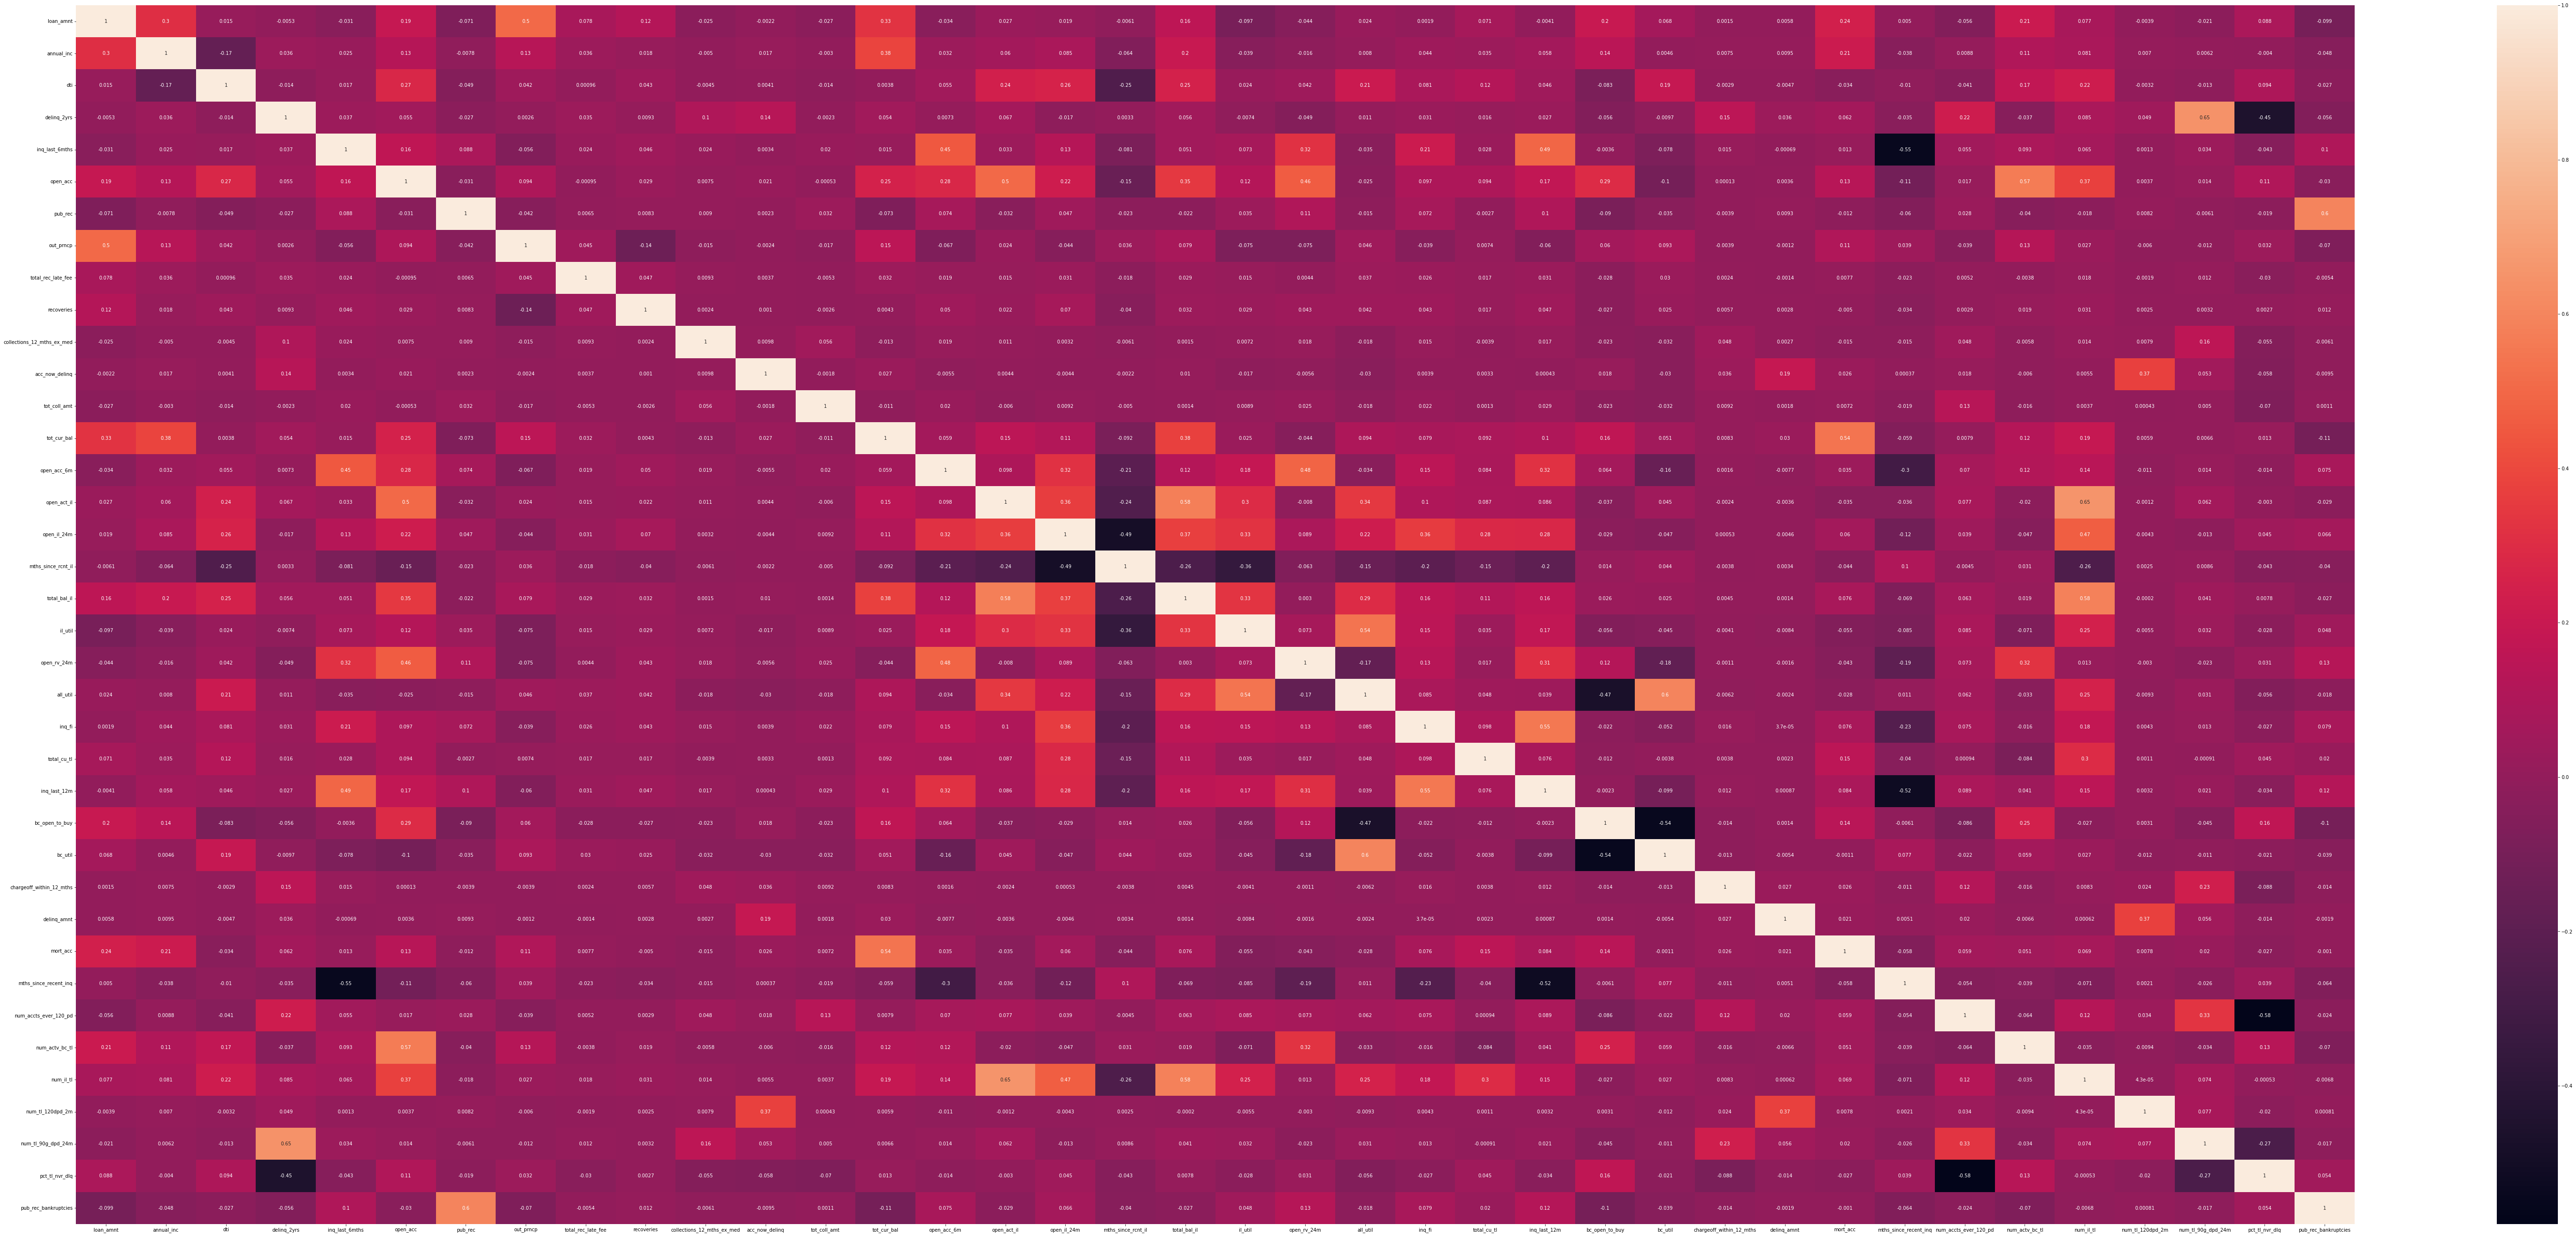

In [20]:
plt.figure(figsize=(107,47))
sns.heatmap(test_copy.corr(),annot=True)

# ‘Int_rate’ column is character type. With the help of lambda function convert into float type

In [21]:
test_copy.dtypes

loan_amnt                     float64
term                           object
int_rate                       object
grade                          object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_util                     object
initial_list_status            object
out_prncp                     float64
total_rec_late_fee            float64
recoveries                    float64
last_pymnt_d                   object
collections_12_mths_ex_med    float64
application_type               object
acc_now_deli

In [22]:
test_copy["int_rate"]=test_copy["int_rate"].str.replace("%","").astype(float)

# Replace months from the term column and convert the dtype to Float

In [23]:
test_copy["term"]=test_copy["term"].str.replace("months","").astype("object")

# Convert the emp_lenght column into a numeric column

In [24]:
test_copy["emp_length"]=test_copy["emp_length"].str.replace("<","",regex=True).str.replace("years","",regex=True).str.replace("year","",regex=True).str.replace("+","",regex=True)

# ‘revol_util’ column is character type. With the help of lambda function convert into float type

In [25]:
test_copy["revol_util"]=test_copy["revol_util"].str.replace("%","").astype(float)

# Univeriate Analysis

In [26]:
test_copy.head()

loan_amnt  term  int_rate grade emp_length home_ownership  annual_inc  \
0    10000.0   60      19.53     D         4             OWN     52000.0   
1    35000.0   60      20.75     E         3        MORTGAGE     85000.0   
2    20000.0   60       9.16     B         1        MORTGAGE     77000.0   
3    17475.0   60      11.47     B        NaN       MORTGAGE     41682.0   
4     8000.0   36       9.16     B        10            RENT     72000.0   

  verification_status   issue_d loan_status pymnt_plan             purpose  \
0     Source Verified  Mar-2016  Fully Paid          n               other   
1     Source Verified  Mar-2016  Fully Paid          n  debt_consolidation   
2        Not Verified  Mar-2016     Current          n    home_improvement   
3            Verified  Mar-2016     Current          n  debt_consolidation   
4     Source Verified  Mar-2016     Current          n  debt_consolidation   

  addr_state    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0         GA  15.00          0.0             1.0       4.0      2.0   
1         NY  24.98          0.0             1.0       9.0      0.0   
2         IL  13.75          0.0             1.0      14.0      0.0   
3         TX  30.06          0.0             0.0      10.0      0.0   
4         MD  22.63          0.0             0.0       4.0      0.0   

   revol_util initial_list_status  out_prncp  total_rec_late_fee  recoveries  \
0        35.9                   w       0.00                 0.0         0.0   
1        46.6                   w       0.00                 0.0         0.0   
2        13.9                   w   13700.41                 0.0         0.0   
3        27.6                   w   12189.23                 0.0         0.0   
4        98.7                   w    3373.45                 0.0         0.0   

  last_pymnt_d  collections_12_mths_ex_med application_type  acc_now_delinq  \
0     Nov-2016                         0.0       Individual             0.0   
1     Aug-2016                         0.0       Individual             0.0   
2     Feb-2018                         0.0       Individual             0.0   
3     Feb-2018                         0.0       Individual             0.0   
4     Feb-2018                         0.0       Individual             0.0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_24m  \
0         622.0      15886.0          2.0          1.0          5.0   
1           0.0     161643.0          0.0          3.0          3.0   
2           0.0      25031.0          0.0          8.0          0.0   
3           0.0     118388.0          0.0          0.0          0.0   
4           0.0      59568.0          0.0          3.0          3.0   

   mths_since_rcnt_il  total_bal_il  il_util  open_rv_24m  all_util  inq_fi  \
0                 2.0       14809.0     99.0          0.0      88.0     3.0   
1                14.0       73863.0     83.0          1.0      71.0     5.0   
2                46.0       20827.0     38.0          3.0      30.0     1.0   
3                37.0           0.0      NaN          1.0      28.0     0.0   
4                 9.0       39833.0     75.0          0.0      81.0     2.0   

   total_cu_tl  inq_last_12m  bc_open_to_buy  bc_util  \
0          0.0           2.0          1623.0     39.9   
1          1.0           2.0          4833.0     67.8   
2          0.0           2.0         21491.0      3.6   
3          0.0           0.0         17072.0     20.4   
4          6.0           1.0             NaN      NaN   

   chargeoff_within_12_mths  delinq_amnt  mort_acc  mths_since_recent_inq  \
0                       0.0          0.0       0.0                    4.0   
1                       0.0          0.0       1.0                    5.0   
2                       0.0          0.0       0.0                    3.0   
3                       0.0          0.0       1.0                    NaN   
4                       0.0          0.0       0.0              

In [27]:
test_copy["issue_d"].unique()

array(['Mar-2016', 'Feb-2016', 'Jan-2016', nan], dtype=object)

In [28]:
test_copy["last_pymnt_d"].unique()

array(['Nov-2016', 'Aug-2016', 'Feb-2018', 'Mar-2017', 'Jul-2017',
       'Aug-2017', 'Apr-2016', 'Jan-2018', 'Dec-2017', 'Dec-2016',
       'Oct-2017', 'Jul-2016', 'Nov-2017', 'Jun-2016', 'Sep-2016',
       'Feb-2017', 'Oct-2016', 'May-2017', 'Jun-2017', 'Sep-2017',
       'Jan-2017', 'Apr-2017', 'May-2016', nan, 'Mar-2016', 'Feb-2016',
       'Jan-2016'], dtype=object)

In [29]:
test_copy["issue_d"]=test_copy["issue_d"].replace(["Mar-2016","Feb-2016","Jan-2016"],["03-2016","02-2016","01-2016"])
test_copy.head()

loan_amnt  term  int_rate grade emp_length home_ownership  annual_inc  \
0    10000.0   60      19.53     D         4             OWN     52000.0   
1    35000.0   60      20.75     E         3        MORTGAGE     85000.0   
2    20000.0   60       9.16     B         1        MORTGAGE     77000.0   
3    17475.0   60      11.47     B        NaN       MORTGAGE     41682.0   
4     8000.0   36       9.16     B        10            RENT     72000.0   

  verification_status  issue_d loan_status pymnt_plan             purpose  \
0     Source Verified  03-2016  Fully Paid          n               other   
1     Source Verified  03-2016  Fully Paid          n  debt_consolidation   
2        Not Verified  03-2016     Current          n    home_improvement   
3            Verified  03-2016     Current          n  debt_consolidation   
4     Source Verified  03-2016     Current          n  debt_consolidation   

  addr_state    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0         GA  15.00          0.0             1.0       4.0      2.0   
1         NY  24.98          0.0             1.0       9.0      0.0   
2         IL  13.75          0.0             1.0      14.0      0.0   
3         TX  30.06          0.0             0.0      10.0      0.0   
4         MD  22.63          0.0             0.0       4.0      0.0   

   revol_util initial_list_status  out_prncp  total_rec_late_fee  recoveries  \
0        35.9                   w       0.00                 0.0         0.0   
1        46.6                   w       0.00                 0.0         0.0   
2        13.9                   w   13700.41                 0.0         0.0   
3        27.6                   w   12189.23                 0.0         0.0   
4        98.7                   w    3373.45                 0.0         0.0   

  last_pymnt_d  collections_12_mths_ex_med application_type  acc_now_delinq  \
0     Nov-2016                         0.0       Individual             0.0   
1     Aug-2016                         0.0       Individual             0.0   
2     Feb-2018                         0.0       Individual             0.0   
3     Feb-2018                         0.0       Individual             0.0   
4     Feb-2018                         0.0       Individual             0.0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_24m  \
0         622.0      15886.0          2.0          1.0          5.0   
1           0.0     161643.0          0.0          3.0          3.0   
2           0.0      25031.0          0.0          8.0          0.0   
3           0.0     118388.0          0.0          0.0          0.0   
4           0.0      59568.0          0.0          3.0          3.0   

   mths_since_rcnt_il  total_bal_il  il_util  open_rv_24m  all_util  inq_fi  \
0                 2.0       14809.0     99.0          0.0      88.0     3.0   
1                14.0       73863.0     83.0          1.0      71.0     5.0   
2                46.0       20827.0     38.0          3.0      30.0     1.0   
3                37.0           0.0      NaN          1.0      28.0     0.0   
4                 9.0       39833.0     75.0          0.0      81.0     2.0   

   total_cu_tl  inq_last_12m  bc_open_to_buy  bc_util  \
0          0.0           2.0          1623.0     39.9   
1          1.0           2.0          4833.0     67.8   
2          0.0           2.0         21491.0      3.6   
3          0.0           0.0         17072.0     20.4   
4          6.0           1.0             NaN      NaN   

   chargeoff_within_12_mths  delinq_amnt  mort_acc  mths_since_recent_inq  \
0                       0.0          0.0       0.0                    4.0   
1                       0.0          0.0       1.0                    5.0   
2                       0.0          0.0       0.0                    3.0   
3                       0.0          0.0       1.0                    NaN   
4                       0.0          0.0       0.0                    

In [30]:
test_copy["last_pymnt_d"]=test_copy["issue_d"].replace(["Mar-2016","Feb-2016","Jan-2016"],["03-2016","02-2016","01-2016"])
test_copy.head()

loan_amnt  term  int_rate grade emp_length home_ownership  annual_inc  \
0    10000.0   60      19.53     D         4             OWN     52000.0   
1    35000.0   60      20.75     E         3        MORTGAGE     85000.0   
2    20000.0   60       9.16     B         1        MORTGAGE     77000.0   
3    17475.0   60      11.47     B        NaN       MORTGAGE     41682.0   
4     8000.0   36       9.16     B        10            RENT     72000.0   

  verification_status  issue_d loan_status pymnt_plan             purpose  \
0     Source Verified  03-2016  Fully Paid          n               other   
1     Source Verified  03-2016  Fully Paid          n  debt_consolidation   
2        Not Verified  03-2016     Current          n    home_improvement   
3            Verified  03-2016     Current          n  debt_consolidation   
4     Source Verified  03-2016     Current          n  debt_consolidation   

  addr_state    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0         GA  15.00          0.0             1.0       4.0      2.0   
1         NY  24.98          0.0             1.0       9.0      0.0   
2         IL  13.75          0.0             1.0      14.0      0.0   
3         TX  30.06          0.0             0.0      10.0      0.0   
4         MD  22.63          0.0             0.0       4.0      0.0   

   revol_util initial_list_status  out_prncp  total_rec_late_fee  recoveries  \
0        35.9                   w       0.00                 0.0         0.0   
1        46.6                   w       0.00                 0.0         0.0   
2        13.9                   w   13700.41                 0.0         0.0   
3        27.6                   w   12189.23                 0.0         0.0   
4        98.7                   w    3373.45                 0.0         0.0   

  last_pymnt_d  collections_12_mths_ex_med application_type  acc_now_delinq  \
0      03-2016                         0.0       Individual             0.0   
1      03-2016                         0.0       Individual             0.0   
2      03-2016                         0.0       Individual             0.0   
3      03-2016                         0.0       Individual             0.0   
4      03-2016                         0.0       Individual             0.0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_24m  \
0         622.0      15886.0          2.0          1.0          5.0   
1           0.0     161643.0          0.0          3.0          3.0   
2           0.0      25031.0          0.0          8.0          0.0   
3           0.0     118388.0          0.0          0.0          0.0   
4           0.0      59568.0          0.0          3.0          3.0   

   mths_since_rcnt_il  total_bal_il  il_util  open_rv_24m  all_util  inq_fi  \
0                 2.0       14809.0     99.0          0.0      88.0     3.0   
1                14.0       73863.0     83.0          1.0      71.0     5.0   
2                46.0       20827.0     38.0          3.0      30.0     1.0   
3                37.0           0.0      NaN          1.0      28.0     0.0   
4                 9.0       39833.0     75.0          0.0      81.0     2.0   

   total_cu_tl  inq_last_12m  bc_open_to_buy  bc_util  \
0          0.0           2.0          1623.0     39.9   
1          1.0           2.0          4833.0     67.8   
2          0.0           2.0         21491.0      3.6   
3          0.0           0.0         17072.0     20.4   
4          6.0           1.0             NaN      NaN   

   chargeoff_within_12_mths  delinq_amnt  mort_acc  mths_since_recent_inq  \
0                       0.0          0.0       0.0                    4.0   
1                       0.0          0.0       1.0                    5.0   
2                       0.0          0.0       0.0                    3.0   
3                       0.0          0.0       1.0                    NaN   
4                       0.0          0.0       0.0                    

In [31]:
test_copy["issue_d"]=pd.to_datetime(test_copy["issue_d"],format="%m-%Y")
test_copy.dtypes

loan_amnt                            float64
term                                  object
int_rate                             float64
grade                                 object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
purpose                               object
addr_state                            object
dti                                  float64
delinq_2yrs                          float64
inq_last_6mths                       float64
open_acc                             float64
pub_rec                              float64
revol_util                           float64
initial_list_status                   object
out_prncp                            float64
total_rec_late_fee                   float64
recoveries

# Count plot for term column

Text(0.5, 1.0, 'Count the customer on the basis of term ')

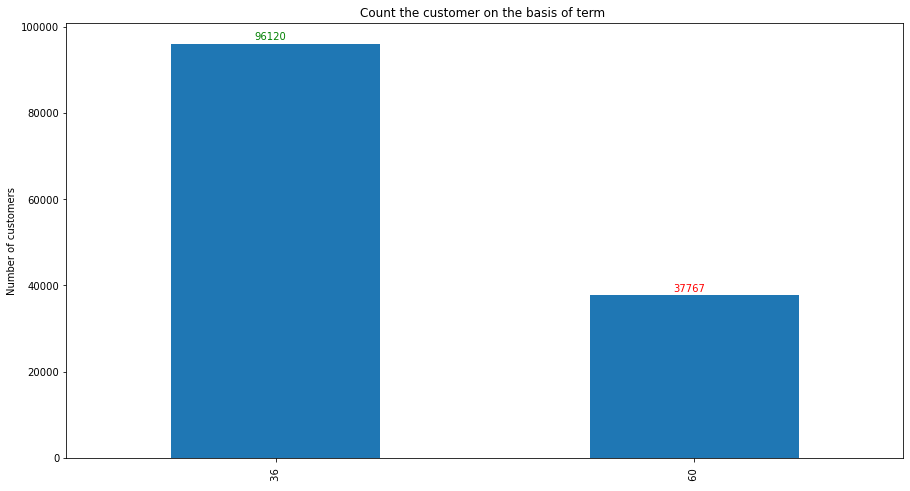

In [32]:
plt.figure(figsize=(15,8))
test_copy["term"].value_counts().plot(kind="bar")
plt.text(x=-0.05,y=97000,s=test_copy["term"].value_counts()[0],color="g")
plt.text(x=0.95,y=38500,s=test_copy["term"].value_counts()[1],color="r")
plt.ylabel("Number of customers")
plt.title("Count the customer on the basis of term ")

In [33]:
test_copy.shape

(133889, 55)

In [34]:
number_of_customer_use_36_months_term = 96120
number_of_customer_use_60_months_term = 37767
total_customers=number_of_customer_use_36_months_term+number_of_customer_use_60_months_term
print("Total customer are : ",total_customers)
print("Total customer having no record for term in the dataset are :", test_copy.shape[0]-total_customers)
print("Greater number of customers are using 36 months term :",test_copy["term"].value_counts()[0])
print("Number of customes are using 60 months term :",test_copy["term"].value_counts()[1])

Total customer are :  133887
Total customer having no record for term in the dataset are : 2
Greater number of customers are using 36 months term : 96120
Number of customes are using 60 months term : 37767


# Plot pie plot for grade column

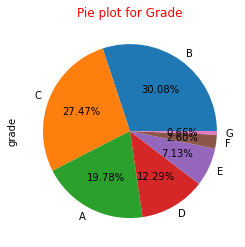

In [35]:
plt.figure(figsize=(21,4))
test_copy["grade"].value_counts().plot(kind="pie",autopct='%.2f%%')
plt.title("Pie plot for Grade",color="r");

Most of the customer prefer grade B, which is 30.08% of the total data. After that customer prefer Grade C which cover 27.47% of the data.

# Distribution plot for int_rate column

Text(20, 0.12, 'Max Number of Customer are paying int_rate :11.99')

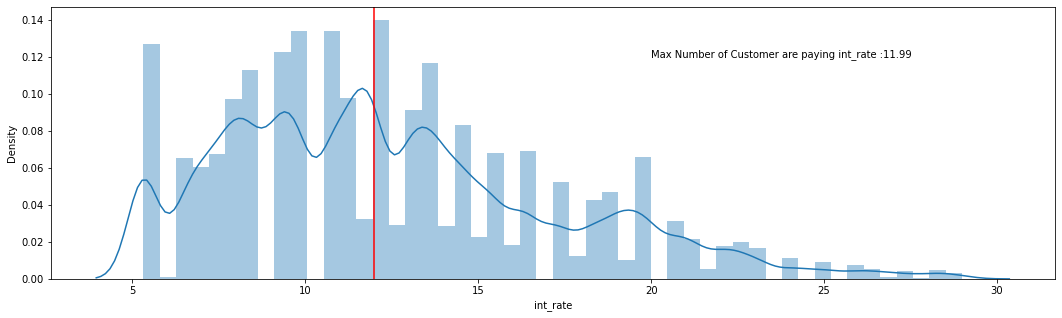

In [36]:
plt.figure(figsize=(18,5))
sns.distplot(test_copy["int_rate"]);
plt.axvline(test_copy["int_rate"].mode()[0],color="r")
plt.text(x=20,y=0.12, s="Max Number of Customer are paying int_rate :"+ str(test_copy["int_rate"].mode()[0]))

From the graph we can say that data is not normally distributed.
Also the data is right skewed.

# Ploting Bar plot for home_ownership.

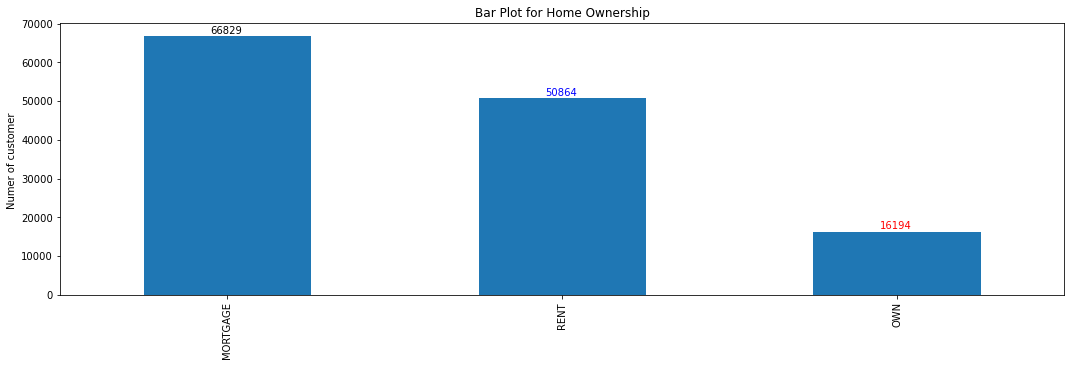

In [37]:
plt.figure(figsize=(18,5))
test_copy["home_ownership"].value_counts().plot(kind="bar")
plt.text(x=-0.05,y=67500,s=test_copy["home_ownership"].value_counts()[0],color="black")
plt.text(x=.95,y=51500,s=test_copy["home_ownership"].value_counts()[1],color="blue")
plt.text(x=1.95,y=17000,s=test_copy["home_ownership"].value_counts()[2],color="r")
plt.title("Bar Plot for Home Ownership")
plt.ylabel("Numer of customer ");

The max customer who taking loan and their home_ownership status is Mortgage is 66829.

# Bar Plot for verification_status

In [38]:
test_copy["verification_status"].value_counts()

Source Verified    50425
Not Verified       47100
Verified           36362
Name: verification_status, dtype: int64

Text(0.5, 1.0, 'Count the customer on the basis of verification status')

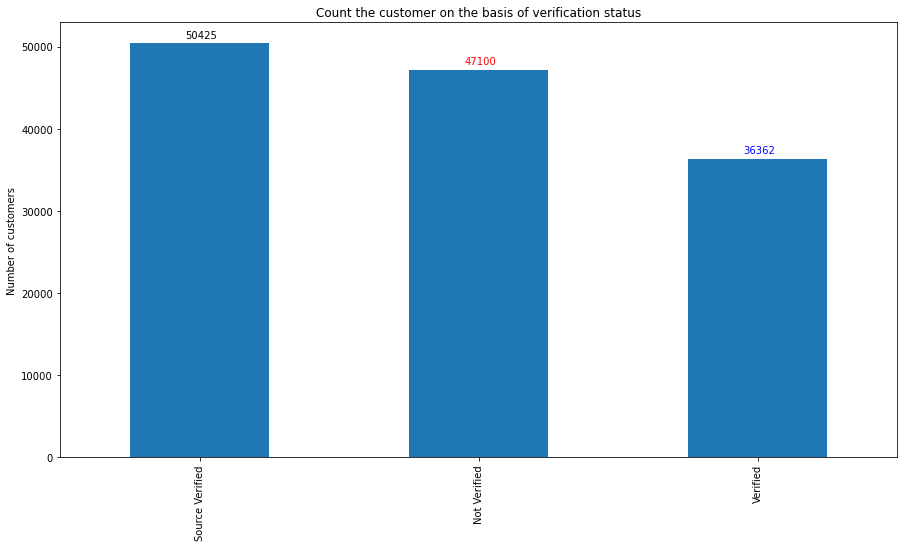

In [39]:
plt.figure(figsize=(15,8))
test_copy["verification_status"].value_counts().plot(kind="bar")
plt.text(x=-0.05,y=51000,s=test_copy["verification_status"].value_counts()[0],color="black")
plt.text(x=0.95,y=47800,s=test_copy["verification_status"].value_counts()[1],color="r")
plt.text(x=1.95,y=37000,s=test_copy["verification_status"].value_counts()[2],color="blue")
plt.ylabel("Number of customers")
plt.title("Count the customer on the basis of verification status")

In [40]:
The_total=test_copy["verification_status"].value_counts()[0]+test_copy["verification_status"].value_counts()[1]
print("Total number of customer are not verified are :",The_total)

Total number of customer are not verified are : 97525


# Bar plot for loan status

Text(0.5, 1.0, 'Count the customer on the basis of term ')

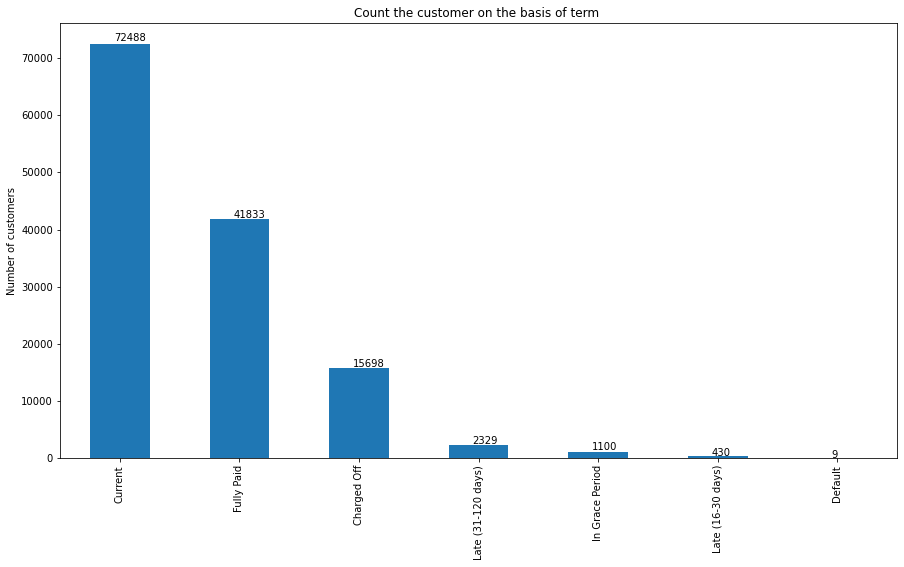

In [41]:
plt.figure(figsize=(15,8))
test_copy["loan_status"].value_counts().plot(kind="bar")
plt.text(x=-0.05,y=73000,s=test_copy["loan_status"].value_counts()[0])
plt.text(x=0.95,y=42000,s=test_copy["loan_status"].value_counts()[1])
plt.text(x=1.95,y=16000,s=test_copy["loan_status"].value_counts()[2])
plt.text(x=2.95,y=2400,s=test_copy["loan_status"].value_counts()[3])
plt.text(x=3.95,y=1500,s=test_copy["loan_status"].value_counts()[4])
plt.text(x=4.95,y=450,s=test_copy["loan_status"].value_counts()[5])
plt.text(x=5.95,y=15,s=test_copy["loan_status"].value_counts()[6])
plt.ylabel("Number of customers")
plt.title("Count the customer on the basis of term ")

# Distplot for Revol Util

Text(110, 0.01, 'Median  of Customer are paying revol util :51.8')

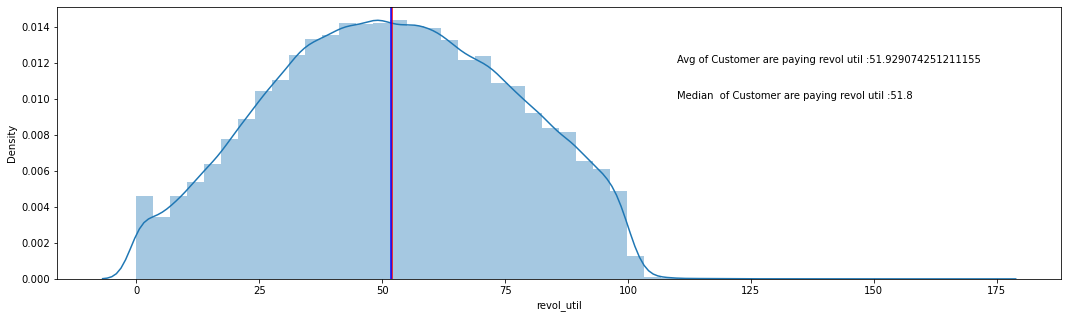

In [42]:
plt.figure(figsize=(18,5))
sns.distplot(test_copy["revol_util"]);
plt.axvline(test_copy["revol_util"].mean(),color="r")
plt.axvline(test_copy["revol_util"].median(),color="b")
plt.text(x=110,y=0.012, s="Avg of Customer are paying revol util :"+ str(test_copy["revol_util"].mean()))
plt.text(x=110,y=0.010, s="Median  of Customer are paying revol util :"+ str(test_copy["revol_util"].median()))

# Bar plot for addrest state

Text(0.5, 1.0, 'Count the customer on the basis of address state')

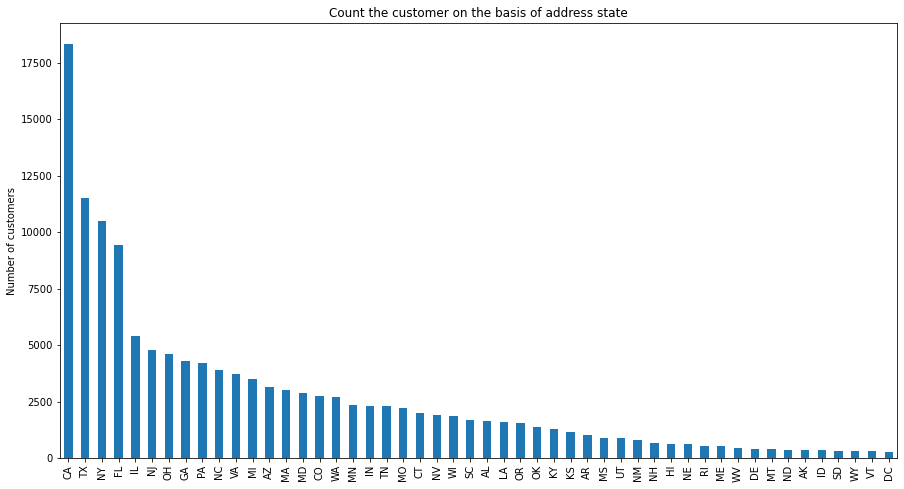

In [43]:
plt.figure(figsize=(15,8))
test_copy["addr_state"].value_counts().plot(kind="bar")
plt.ylabel("Number of customers")
plt.title("Count the customer on the basis of address state")

# Bivariate analysis

# Ploting the Scatter plot for loan amount and annual income of the customer

From the above plot we can said the annual income does not depend on the loan amount 
aslo most customer have annual income less than 20,00,000 and there is some outlier present above the 20,00,000 value.

# Comparing amount of loan taken by different areas.

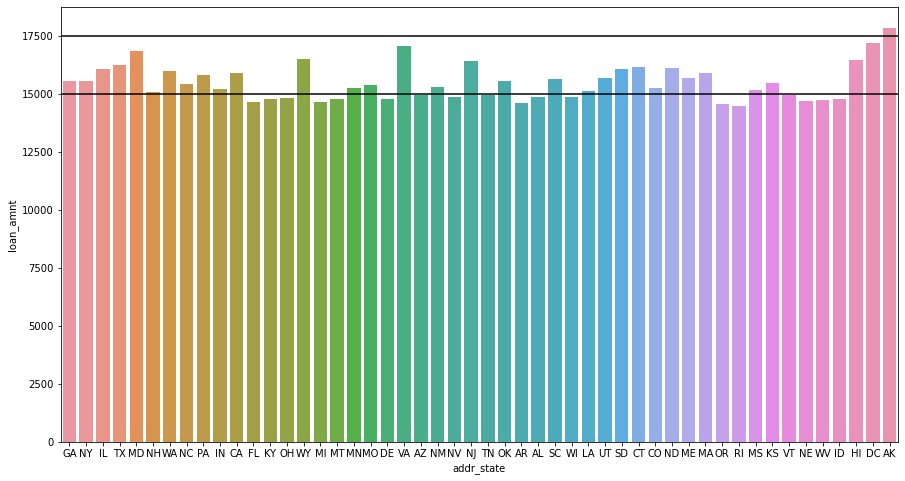

In [44]:
plt.figure(figsize=(15,8))
sns.barplot(x=test_copy["addr_state"],y=test_copy["loan_amnt"],ci=None)
plt.axhline(17500,color="black")
plt.axhline(15000,color="black")

# grade vs int_rate

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

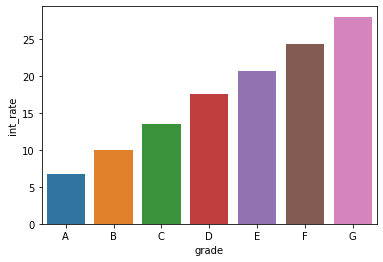

In [45]:
sns.barplot(x=test_copy["grade"],y=test_copy["int_rate"],ci=False, order=["A","B","C","D","E","F","G"])

As we moved the grade from A - G the int_rate is increasing , means a person taking loan under the grade G is paying 
highest interst rate and if a person taking loan under the grade A is paying the minimun interest rate.

In [46]:
test_copy.head()

loan_amnt  term  int_rate grade emp_length home_ownership  annual_inc  \
0    10000.0   60      19.53     D         4             OWN     52000.0   
1    35000.0   60      20.75     E         3        MORTGAGE     85000.0   
2    20000.0   60       9.16     B         1        MORTGAGE     77000.0   
3    17475.0   60      11.47     B        NaN       MORTGAGE     41682.0   
4     8000.0   36       9.16     B        10            RENT     72000.0   

  verification_status    issue_d loan_status pymnt_plan             purpose  \
0     Source Verified 2016-03-01  Fully Paid          n               other   
1     Source Verified 2016-03-01  Fully Paid          n  debt_consolidation   
2        Not Verified 2016-03-01     Current          n    home_improvement   
3            Verified 2016-03-01     Current          n  debt_consolidation   
4     Source Verified 2016-03-01     Current          n  debt_consolidation   

  addr_state    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0         GA  15.00          0.0             1.0       4.0      2.0   
1         NY  24.98          0.0             1.0       9.0      0.0   
2         IL  13.75          0.0             1.0      14.0      0.0   
3         TX  30.06          0.0             0.0      10.0      0.0   
4         MD  22.63          0.0             0.0       4.0      0.0   

   revol_util initial_list_status  out_prncp  total_rec_late_fee  recoveries  \
0        35.9                   w       0.00                 0.0         0.0   
1        46.6                   w       0.00                 0.0         0.0   
2        13.9                   w   13700.41                 0.0         0.0   
3        27.6                   w   12189.23                 0.0         0.0   
4        98.7                   w    3373.45                 0.0         0.0   

  last_pymnt_d  collections_12_mths_ex_med application_type  acc_now_delinq  \
0      03-2016                         0.0       Individual             0.0   
1      03-2016                         0.0       Individual             0.0   
2      03-2016                         0.0       Individual             0.0   
3      03-2016                         0.0       Individual             0.0   
4      03-2016                         0.0       Individual             0.0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_24m  \
0         622.0      15886.0          2.0          1.0          5.0   
1           0.0     161643.0          0.0          3.0          3.0   
2           0.0      25031.0          0.0          8.0          0.0   
3           0.0     118388.0          0.0          0.0          0.0   
4           0.0      59568.0          0.0          3.0          3.0   

   mths_since_rcnt_il  total_bal_il  il_util  open_rv_24m  all_util  inq_fi  \
0                 2.0       14809.0     99.0          0.0      88.0     3.0   
1                14.0       73863.0     83.0          1.0      71.0     5.0   
2                46.0       20827.0     38.0          3.0      30.0     1.0   
3                37.0           0.0      NaN          1.0      28.0     0.0   
4                 9.0       39833.0     75.0          0.0      81.0     2.0   

   total_cu_tl  inq_last_12m  bc_open_to_buy  bc_util  \
0          0.0           2.0          1623.0     39.9   
1          1.0           2.0          4833.0     67.8   
2          0.0           2.0         21491.0      3.6   
3          0.0           0.0         17072.0     20.4   
4          6.0           1.0             NaN      NaN   

   chargeoff_within_12_mths  delinq_amnt  mort_acc  mths_since_recent_inq  \
0                       0.0          0.0       0.0                    4.0   
1                       0.0          0.0       1.0                    5.0   
2                       0.0          0.0       0.0                    3.0   
3                       0.0          0.0       1.0                    NaN   
4                       0.0          0.0       0.0        

# Pairplot for multiple columns

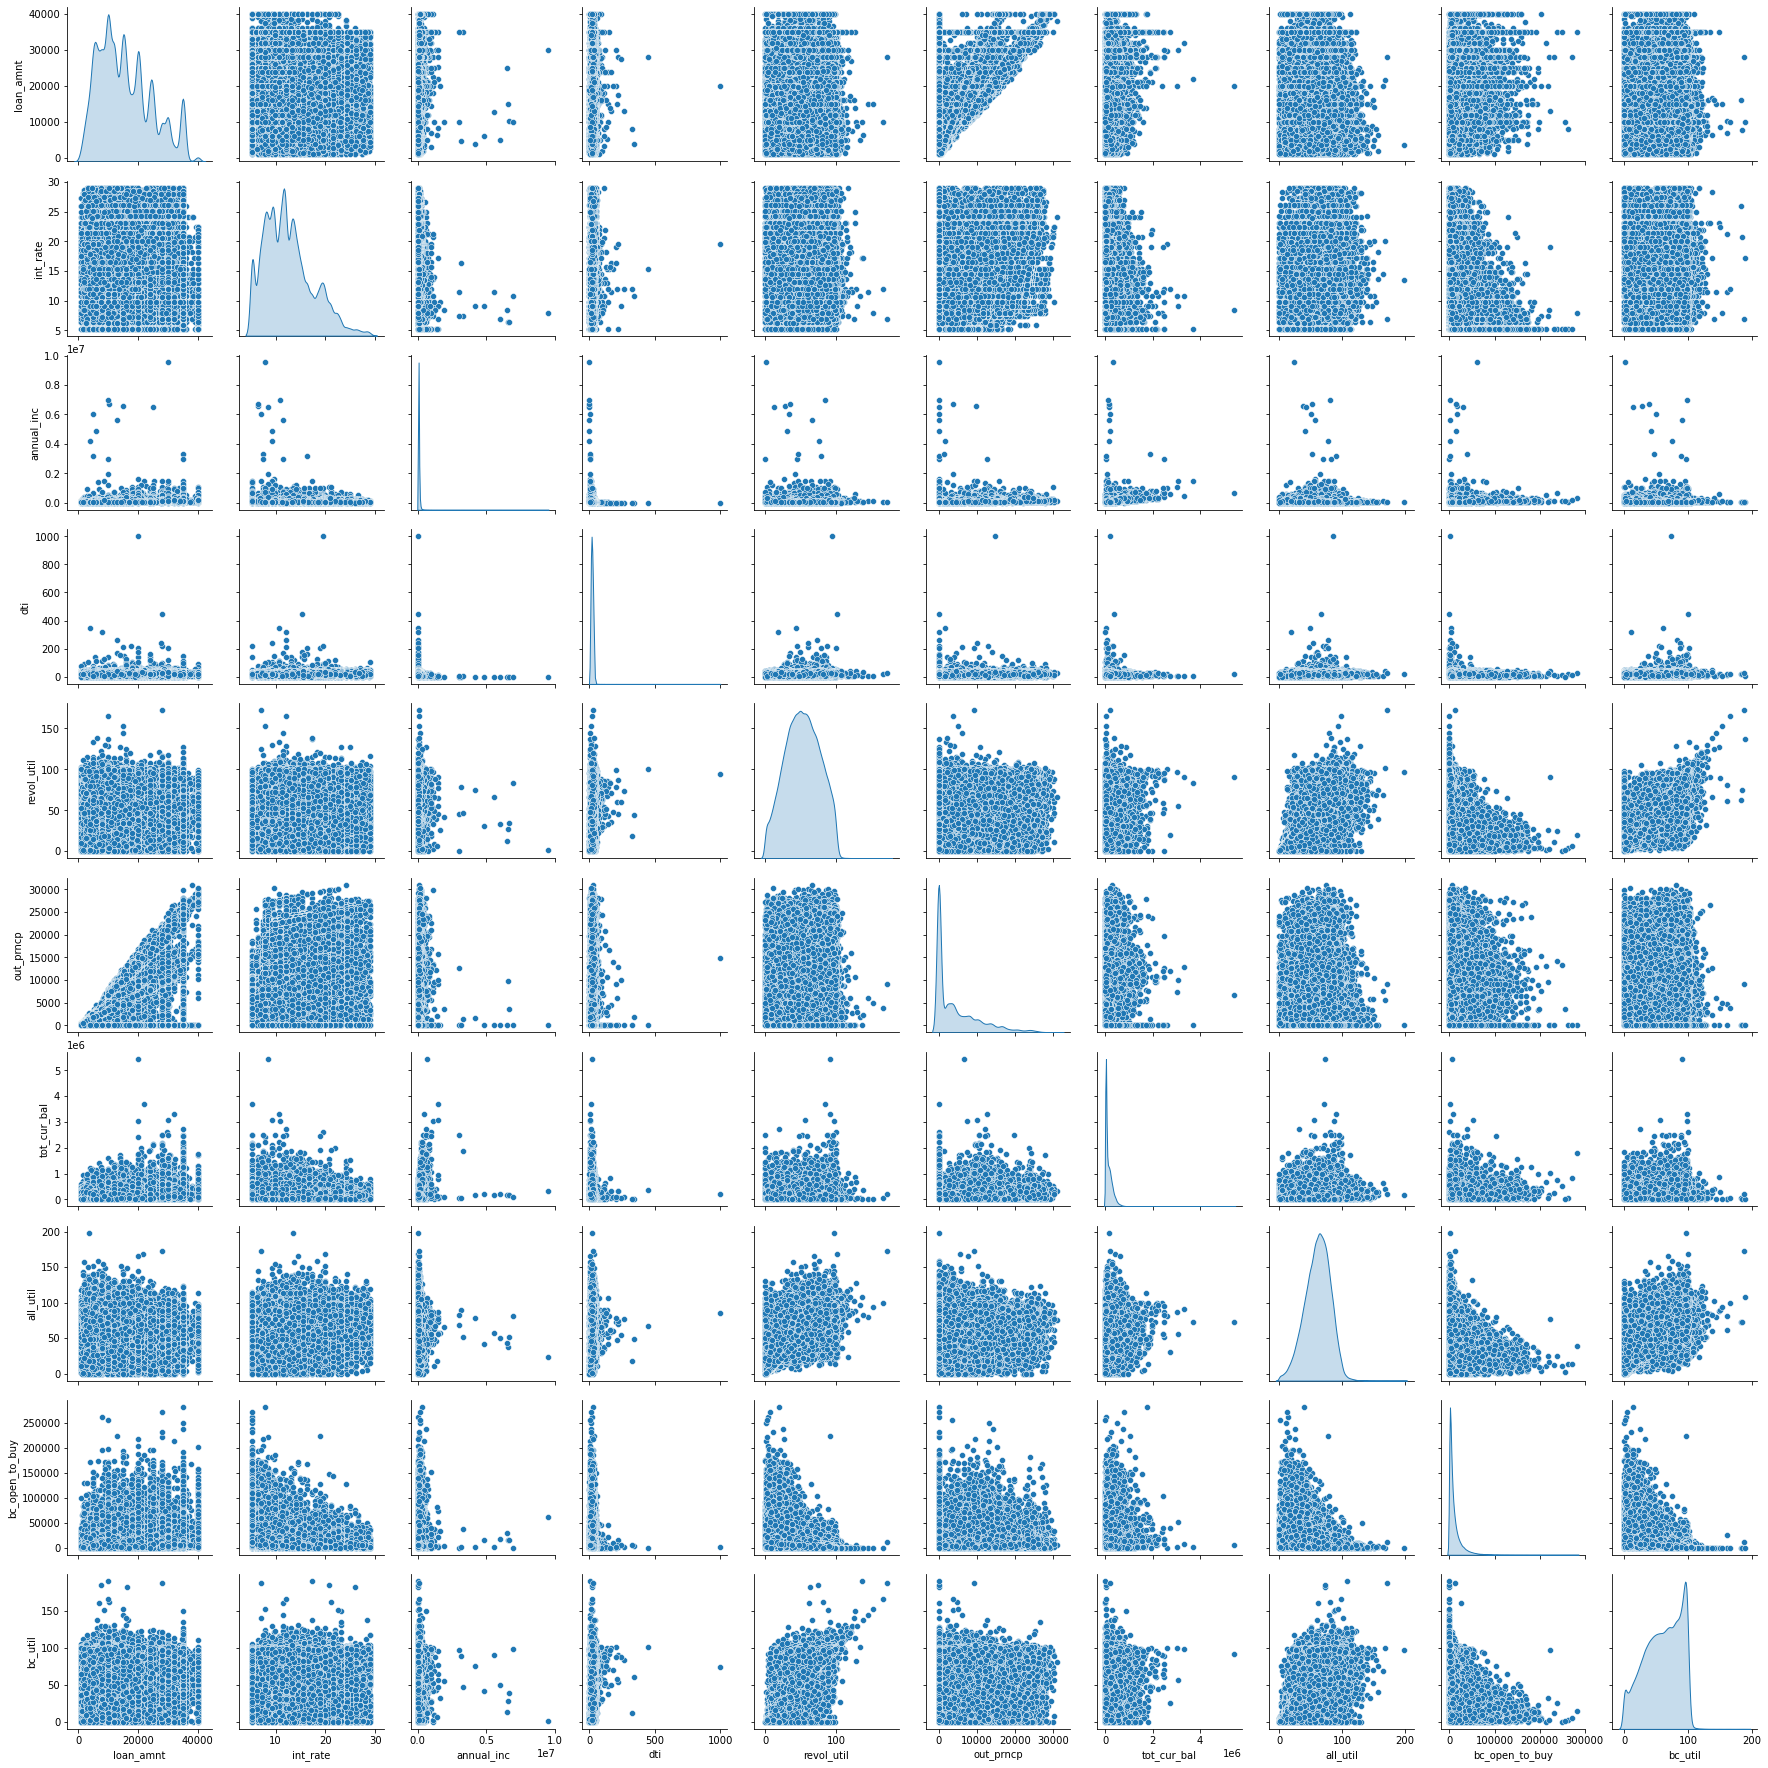

In [47]:
sns.pairplot(test_copy[["loan_amnt","int_rate","annual_inc","dti","revol_util","out_prncp","tot_cur_bal","all_util","bc_open_to_buy","bc_util"]],diag_kind="kde")


<AxesSubplot:xlabel='pymnt_plan', ylabel='loan_amnt'>

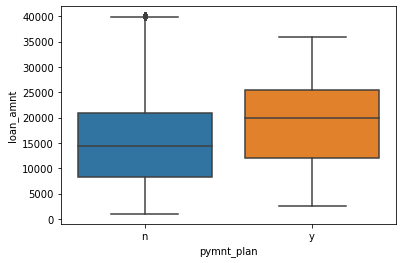

In [48]:
sns.boxplot(x=test_copy["pymnt_plan"],y=test_copy["loan_amnt"])

# how many borrowers are in different grades on the basis of there verification status

verification_status  Not Verified  Source Verified  Verified
grade                                                       
A                           14331             8212      3939
B                           15857            15732      8678
C                           10593            14680     11504
D                            4304             6238      5912
E                            1494             4009      4037
F                             440             1271      1771
G                              81              283       521


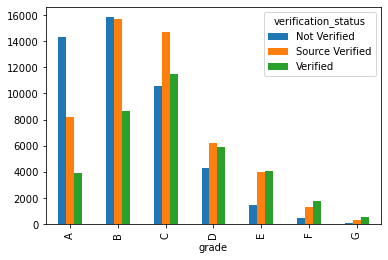

In [50]:
ax=pd.crosstab(test_copy["grade"],test_copy["verification_status"],margins=False)
ax.plot(kind="bar")
print(ax)

In [51]:
max(test_copy["loan_amnt"])

40000.0

# Finding out the risky customers are verified or not

verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off                  3900             6020      5778
Current                     27038            26852     18598
Default                         1                5         3
Fully Paid                  15072            16054     10707
In Grace Period               326              422       352
Late (16-30 days)             124              162       144
Late (31-120 days)            639              910       780


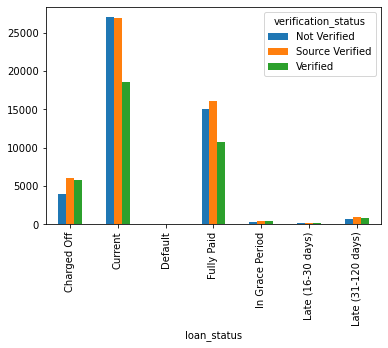

In [52]:
ax=pd.crosstab(test_copy["loan_status"],test_copy["verification_status"],margins=False)
ax.plot(kind="bar")
print(ax)

# Boxplot for loan_status, loan amount, and term

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

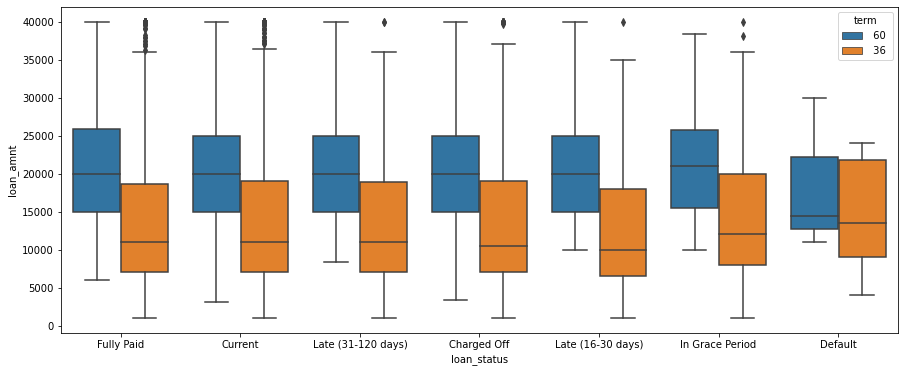

In [53]:
plt.figure(figsize=(15,6))
sns.boxplot(x=test_copy["loan_status"],y=test_copy["loan_amnt"],hue=test_copy["term"])

# Find the customers having debt settlement flag and checking the relation with loan status

debt_settlement_flag      N     Y
loan_status                      
Charged Off           14118  1580
Current               72480     8
Default                   8     1
Fully Paid            41833     0
In Grace Period        1100     0
Late (16-30 days)       425     5
Late (31-120 days)     2243    86


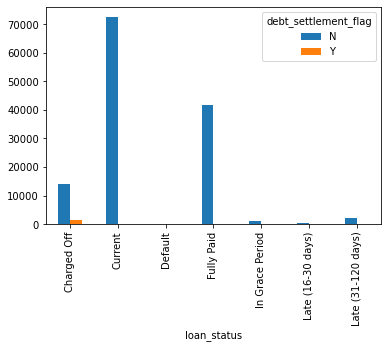

In [54]:
new=pd.crosstab(test_copy["loan_status"],test_copy["debt_settlement_flag"],margins=False)
new.plot(kind="bar")
print(new)

# Scatter plot for annual income, loan amount, and loan status.

<AxesSubplot:xlabel='annual_inc', ylabel='loan_amnt'>

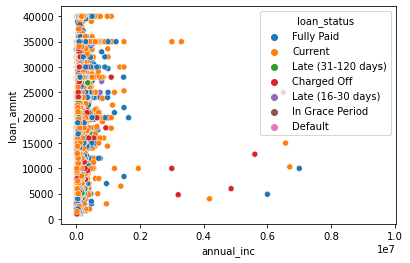

In [55]:
sns.scatterplot(data=test_copy, x='annual_inc', y='loan_amnt', hue='loan_status')

# Finding number of null value present in each attribute.

In [56]:
test_copy.isnull().sum()

loan_amnt                         2
term                              2
int_rate                          2
grade                             2
emp_length                     8946
home_ownership                    2
annual_inc                        2
verification_status               2
issue_d                           2
loan_status                       2
pymnt_plan                        2
purpose                           2
addr_state                        2
dti                              19
delinq_2yrs                       2
inq_last_6mths                    3
open_acc                          2
pub_rec                           2
revol_util                       73
initial_list_status               2
out_prncp                         2
total_rec_late_fee                2
recoveries                        2
last_pymnt_d                      2
collections_12_mths_ex_med        2
application_type                  2
acc_now_delinq                    2
tot_coll_amt                

# Treating null value in each attribute.

In [57]:
test_copy.head()

loan_amnt  term  int_rate grade emp_length home_ownership  annual_inc  \
0    10000.0   60      19.53     D         4             OWN     52000.0   
1    35000.0   60      20.75     E         3        MORTGAGE     85000.0   
2    20000.0   60       9.16     B         1        MORTGAGE     77000.0   
3    17475.0   60      11.47     B        NaN       MORTGAGE     41682.0   
4     8000.0   36       9.16     B        10            RENT     72000.0   

  verification_status    issue_d loan_status pymnt_plan             purpose  \
0     Source Verified 2016-03-01  Fully Paid          n               other   
1     Source Verified 2016-03-01  Fully Paid          n  debt_consolidation   
2        Not Verified 2016-03-01     Current          n    home_improvement   
3            Verified 2016-03-01     Current          n  debt_consolidation   
4     Source Verified 2016-03-01     Current          n  debt_consolidation   

  addr_state    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0         GA  15.00          0.0             1.0       4.0      2.0   
1         NY  24.98          0.0             1.0       9.0      0.0   
2         IL  13.75          0.0             1.0      14.0      0.0   
3         TX  30.06          0.0             0.0      10.0      0.0   
4         MD  22.63          0.0             0.0       4.0      0.0   

   revol_util initial_list_status  out_prncp  total_rec_late_fee  recoveries  \
0        35.9                   w       0.00                 0.0         0.0   
1        46.6                   w       0.00                 0.0         0.0   
2        13.9                   w   13700.41                 0.0         0.0   
3        27.6                   w   12189.23                 0.0         0.0   
4        98.7                   w    3373.45                 0.0         0.0   

  last_pymnt_d  collections_12_mths_ex_med application_type  acc_now_delinq  \
0      03-2016                         0.0       Individual             0.0   
1      03-2016                         0.0       Individual             0.0   
2      03-2016                         0.0       Individual             0.0   
3      03-2016                         0.0       Individual             0.0   
4      03-2016                         0.0       Individual             0.0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_24m  \
0         622.0      15886.0          2.0          1.0          5.0   
1           0.0     161643.0          0.0          3.0          3.0   
2           0.0      25031.0          0.0          8.0          0.0   
3           0.0     118388.0          0.0          0.0          0.0   
4           0.0      59568.0          0.0          3.0          3.0   

   mths_since_rcnt_il  total_bal_il  il_util  open_rv_24m  all_util  inq_fi  \
0                 2.0       14809.0     99.0          0.0      88.0     3.0   
1                14.0       73863.0     83.0          1.0      71.0     5.0   
2                46.0       20827.0     38.0          3.0      30.0     1.0   
3                37.0           0.0      NaN          1.0      28.0     0.0   
4                 9.0       39833.0     75.0          0.0      81.0     2.0   

   total_cu_tl  inq_last_12m  bc_open_to_buy  bc_util  \
0          0.0           2.0          1623.0     39.9   
1          1.0           2.0          4833.0     67.8   
2          0.0           2.0         21491.0      3.6   
3          0.0           0.0         17072.0     20.4   
4          6.0           1.0             NaN      NaN   

   chargeoff_within_12_mths  delinq_amnt  mort_acc  mths_since_recent_inq  \
0                       0.0          0.0       0.0                    4.0   
1                       0.0          0.0       1.0                    5.0   
2                       0.0          0.0       0.0                    3.0   
3                       0.0          0.0       1.0                    NaN   
4                       0.0          0.0       0.0        

In [58]:
test_copy["loan_amnt"]=test_copy["loan_amnt"].fillna(test_copy["loan_amnt"].mean())
test_copy["int_rate"]=test_copy["int_rate"].fillna(test_copy["int_rate"].mean())
test_copy["annual_inc"]=test_copy["annual_inc"].fillna(test_copy["annual_inc"].mean())
test_copy["dti"]=test_copy["dti"].fillna(test_copy["dti"].mean())
test_copy["delinq_2yrs"]=test_copy["delinq_2yrs"].fillna(test_copy["delinq_2yrs"].mean())
test_copy["inq_last_6mths"]=test_copy["inq_last_6mths"].fillna(test_copy["inq_last_6mths"].mean())
test_copy["revol_util"]=test_copy["revol_util"].fillna(test_copy["revol_util"].mean())
test_copy["out_prncp"]=test_copy["out_prncp"].fillna(test_copy["out_prncp"].mean())
test_copy["tot_coll_amt"]=test_copy["tot_coll_amt"].fillna(test_copy["tot_coll_amt"].mean())
test_copy["tot_cur_bal"]=test_copy["tot_cur_bal"].fillna(test_copy["tot_cur_bal"].mean())
test_copy["open_acc"]=test_copy["open_acc"].fillna(test_copy["open_acc"].mean())
test_copy["open_acc_6m"]=test_copy["open_acc_6m"].fillna(test_copy["open_acc_6m"].mean())
test_copy["open_act_il"]=test_copy["open_act_il"].fillna(test_copy["open_act_il"].mean())
test_copy["open_il_24m"]=test_copy["open_il_24m"].fillna(test_copy["open_il_24m"].mean())
test_copy["open_rv_24m"]=test_copy["open_rv_24m"].fillna(test_copy["open_rv_24m"].mean())
test_copy["mths_since_rcnt_il"]=test_copy["mths_since_rcnt_il"].fillna(test_copy["mths_since_rcnt_il"].mean())
test_copy["total_bal_il"]=test_copy["total_bal_il"].fillna(test_copy["total_bal_il"].mean())
test_copy["il_util"]=test_copy["il_util"].fillna(test_copy["il_util"].median())
test_copy["all_util"]=test_copy["all_util"].fillna(test_copy["all_util"].mean())
test_copy["bc_open_to_buy"]=test_copy["bc_open_to_buy"].fillna(test_copy["bc_open_to_buy"].mean())
test_copy["bc_util"]=test_copy["bc_util"].fillna(test_copy["bc_util"].mean())
test_copy["pct_tl_nvr_dlq"]=test_copy["pct_tl_nvr_dlq"].fillna(test_copy["pct_tl_nvr_dlq"].mean())

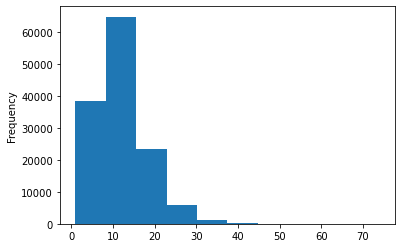

In [59]:
test_copy["open_acc"].plot(kind="hist")
test_copy["open_acc"]=test_copy["open_acc"].fillna(10)

In [60]:
test_copy["pub_rec"].value_counts()
test_copy["pub_rec"]=test_copy["pub_rec"].fillna(0)

In [61]:
test_copy["term"]=test_copy["term"].fillna(36)
test_copy["home_ownership"]=test_copy["home_ownership"].fillna("MORTGAGE")

In [62]:
test_copy["mths_since_recent_inq"].value_counts()

1.0     13148
2.0     10909
0.0     10641
3.0     10192
4.0      9089
5.0      8017
6.0      7279
7.0      6913
8.0      5974
9.0      5168
10.0     4410
11.0     3848
12.0     3387
13.0     2860
14.0     2700
15.0     2409
16.0     2201
17.0     2027
18.0     1792
19.0     1652
20.0     1459
21.0     1291
22.0     1173
23.0     1040
24.0      508
25.0        2
Name: mths_since_recent_inq, dtype: int64

In [63]:
test_copy["grade"]=test_copy["grade"].fillna("B")
test_copy["emp_length"]=test_copy["emp_length"].fillna(test_copy["emp_length"].median())
test_copy["loan_status"]=test_copy["loan_status"].fillna("Current")
test_copy["verification_status"]=test_copy["verification_status"].fillna("Source Verified")
test_copy["pymnt_plan"]=test_copy["pymnt_plan"].fillna("n")
test_copy["purpose"]=test_copy["purpose"].fillna("debt_consolidation")
test_copy["addr_state"]=test_copy["addr_state"].fillna("CA")
test_copy["initial_list_status"]=test_copy["initial_list_status"].fillna("w")
test_copy["total_rec_late_fee"]=test_copy["total_rec_late_fee"].fillna(test_copy["total_rec_late_fee"].mean())
test_copy["recoveries"]=test_copy["recoveries"].fillna(test_copy["recoveries"].mean())
test_copy["collections_12_mths_ex_med"]=test_copy["collections_12_mths_ex_med"].fillna(0.0)
test_copy["application_type"]=test_copy["application_type"].fillna("Individual")
test_copy["acc_now_delinq"]=test_copy["acc_now_delinq"].fillna(0.0)
test_copy["mths_since_recent_inq"]=test_copy["mths_since_recent_inq"].fillna(test_copy["mths_since_recent_inq"].median())
test_copy["num_tl_120dpd_2m"]=test_copy["num_tl_120dpd_2m"].fillna(test_copy["num_tl_120dpd_2m"].median())
test_copy["hardship_flag"]=test_copy["hardship_flag"].fillna("N")
test_copy["debt_settlement_flag"]=test_copy["debt_settlement_flag"].fillna("N")
test_copy["pub_rec_bankruptcies"]=test_copy["pub_rec_bankruptcies"].fillna(test_copy["pub_rec_bankruptcies"].median())

In [64]:
test_copy=test_copy.fillna(0)

# After treating the null values

In [65]:
test_copy.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_util                    0
initial_list_status           0
out_prncp                     0
total_rec_late_fee            0
recoveries                    0
last_pymnt_d                  0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
open_acc_6m                   0
open_act_il                   0
open_il_